## CLASS TEST Solutions 

In [2]:
import pandas as pd

import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [ ]:
DLY = pd.read_csv("./dly2275.csv", 
                      skiprows=25, 
                      usecols=[0, 2, 3], 
                      names=['date', 'Min_Temp', 'Max_Temp'], 
                      parse_dates=True, 
                      index_col=0
                     )

### Importing the CSV file using pandas library, skip the first 25 rows that include key data and other descriptive content.

### The script will extract the date column indexed at [0] and the temperature column indexed with [4]. 

### Rename the columns extracted as date and Temp and set date column as the index column.

In [ ]:
DLY['Temp'] = (DLY['Min_Temp'] + DLY['Max_Temp'])/2
DLY = DLY[DLY.index.month.isin([12, 1, 2])]
DLY_mean = DLY["1991-12":"2021-02"].mean()

# print(DLY.head())
print(DLY_mean)

Min_Temp    10.143870
Max_Temp     0.052806
Temp         5.098338
dtype: float64


### Initial approach to extract the winter months from the dataframe is to use the .month.isin([12, 1, 2]) approach to only keep the months december, january and february. Then once we have the required months we can then focus on slicing the dataset to only include the the winter months from 1991 to 2020

In [ ]:
ERA5 = xr.open_dataset('./ERA5.nc')

In [ ]:
ERA5

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 1)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 30.5 30.25 30.0
  * time       (time) datetime64[ns] 2023-01-01T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-27 14:31:08 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### Initial approach is to import the .nc file using the xarray library as above. 

### The next step is to convert the temperature to Kelvin and set this to variable temp.

### The np.meshgrid function is used to create a grid of longitude and latitude values based on the longitude and latitude variables in the actual ERA5 dataset imported

### The next step is to plot the contours, axes (projection from the cartopy library) and the temperature color bar

### The next code is used to extract the latitude and longitude values for the station

### The next code sets the minimum and maximum values for the longitude and latitude axes of the plot based on the station's longitude and latitude. Specifically, it sets lon_min and lon_max to be 2 degrees of longitude to the west and east of the station's longitude (stat_lon), respectively. Similarly, it sets lat_min and lat_max to be 1 degree of latitude to the south and north of the station's latitude (stat_lat), respectively

### The set_extent() method takes a list of four values [lon_min, lon_max, lat_min, lat_max] that specify the minimum and maximum values of longitude and latitude to be included in the plot.

### Next we plot the station location with a star and include the coastallines.

Latitude:51.938  
Longitude: -10.241


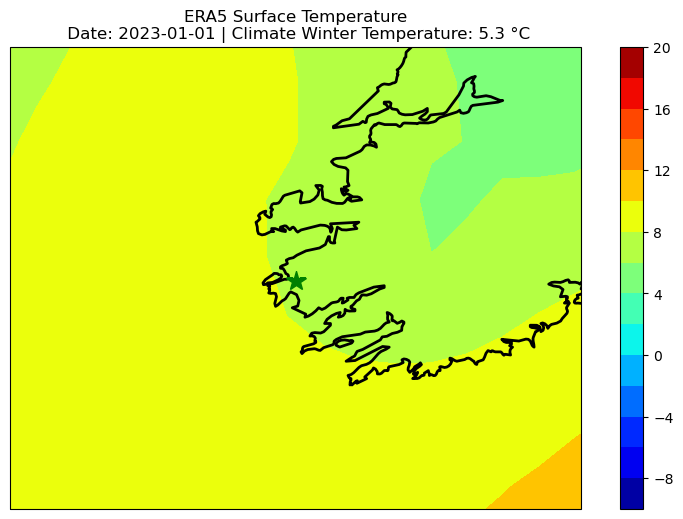

In [ ]:
# Extract the temperature variable
temp = ERA5.t2m[0,:,:]-273.15

lons, lats = np.meshgrid(ERA5.longitude, ERA5.latitude)

# Create a filled contour plot of the temperature
fig = plt.figure(figsize=[10,6])
ax = plt.axes(projection=ccrs.Mercator()) 
myc = ax.contourf(lons, lats, temp, levels=np.arange(-10,20+.1,2), cmap='jet', transform=ccrs.PlateCarree())
plt.colorbar(myc)

# Load the station location from a csv file
station_df = pd.read_csv('./dly2275.csv', skiprows=2, 
                      usecols=[0, 1], 
                      names=['Latitude', 'Longitude'])
station_lat = station_df['Latitude'].values[0]
station_lon = station_df['Longitude'].values[0]

print(station_lat)
print(station_lon)

stat_lat = 51.9
stat_lon = -10.2

# Define the plot extents
lon_min = stat_lon - 2
lon_max = stat_lon + 2
lat_min = stat_lat - 1
lat_max = stat_lat + 1

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot a star at the station location
ax.plot(stat_lon, stat_lat, '*', color='green', markersize=15, transform=ccrs.PlateCarree(), zorder=10)
ax.coastlines(resolution='10m', color='black', linewidth=2, zorder=5)

# Add a title to the plot with the date and climate winter temperature value
plt.title(f"ERA5 Surface Temperature\n Date: {ERA5.time.values[0].astype('datetime64[D]')} | Climate Winter Temperature: {5.3} °C")

# Show the plot
plt.show()

### How the climatology value compares with the reanalysis value:

<div class="alert alert-block alert-info">
<b>Conclusion:</b> The climatology values can be seen to be higher in comparison to the average computed of 5.3 degrees celicuis while from the light green colour we can see that the estimate is above 6 degrees celicius.</div>

E-O-F